In [1]:
import pandas as pd
import healpy as hp
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits

In [33]:
red = pd.read_csv("masks/redmapper_v6.3_errs.csv",header=None)
red.columns = ['red_no','red_ra','red_dec','red_z','red_zerr','red_rh','red_rherr']
header = ['glon','glat']

In [34]:
c=SkyCoord(red['red_ra'],red['red_dec'],frame='icrs',unit='deg')
red['glat'] = c.galactic.b.degree # Galactic Latitude
red['glon'] = c.galactic.l.degree # Galactic Longitude

In [39]:
red.to_csv('masks/redmapper.csv', header=None, index=False, columns=['glon','glat'])

,red_no,red_ra,red_dec,red_z,red_zerr,red_rh,red_rherr,glat,glon
0,1,239.5833,27.2334,0.0948,0.0046,169.8378,4.1870,48.688931,44.230669
1,2,250.0825,46.7115,0.2328,0.0062,199.5393,5.2998,41.474092,72.628844
2,3,197.8730,-1.3411,0.1824,0.0039,164.7122,4.2416,61.124150,313.355063
3,5,137.3007,10.9736,0.1705,0.0036,174.7042,4.9479,35.516547,218.838156
4,6,203.8337,41.0011,0.2317,0.0061,189.1812,5.6134,73.445132,92.652213
...,...,...,...,...,...,...,...,...,...
26106,116793,19.8794,10.9222,0.4849,0.0158,41.9706,9.0028,-51.344664,134.008071
26107,120188,16.9218,28.4904,0.4046,0.0167,27.8751,4.5371,-34.245023,127.251532
26108,146982,180.8308,52.3704,0.3955,0.0195,24.5800,3.1170,63.199603,139.323598
26109,163744,153.8242,43.6354,0.4809,0.0137,33.3058,6.5158,54.586251,174.800458


In [41]:
red = pd.read_csv("masks/redmapper.csv",header=None)
red.columns = ['glon','glat']
red

,glon,glat
0,44.230669,48.688931
1,72.628844,41.474092
2,313.355063,61.124150
3,218.838156,35.516547
4,92.652213,73.445132
...,...,...
26106,134.008071,-51.344664
26107,127.251532,-34.245023
26108,139.323598,63.199603
26109,174.800458,54.586251


NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a g

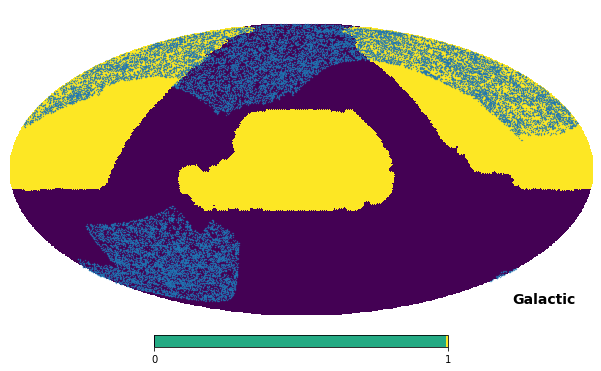

In [42]:
map1 = hp.read_map('masks/DESI.fits')
hp.mollview(map1,norm='hist',coord=['G'],title=' ')
hp.visufunc.projscatter(red['glon'],red['glat'],s=0.1,lonlat= True)

In [69]:
# Read in WHL catalog
whl = pd.read_csv('masks/asu.tsv',sep='\t',header=None)
whl.columns = ['ra','dec']

In [70]:
c=SkyCoord(whl['ra'],whl['dec'],frame='icrs',unit='deg')
whl['glat'] = c.galactic.b.degree # Galactic Latitude
whl['glon'] = c.galactic.l.degree # Galactic Longitude

In [72]:
whl.to_csv('masks/whl.csv', header=None, index=False, columns=['glon','glat'])

In [73]:
whl = pd.read_csv("masks/whl.csv",header=None)
whl.columns = ['glon','glat']
whl

,glon,glat
0,110.449780,-29.412917
1,100.049572,-55.283432
2,110.203238,-30.366812
3,110.350592,-29.827792
4,98.226095,-57.913027
...,...,...
132679,107.667899,-38.665737
132680,104.152282,-47.689671
132681,96.879800,-59.541787
132682,107.386162,-39.528436


/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a g

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


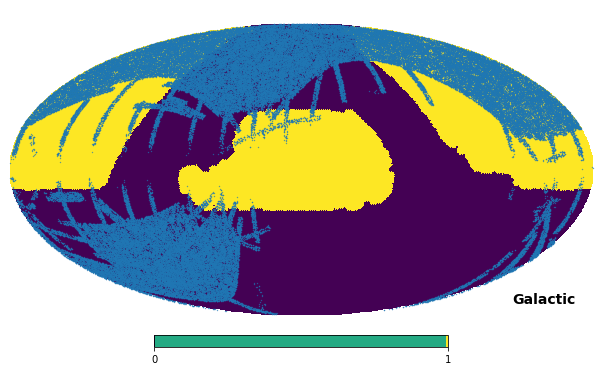

In [74]:
map1 = hp.read_map('masks/DESI.fits')
hp.mollview(map1,norm='hist',coord=['G'],title=' ')
hp.visufunc.projscatter(whl['glon'],whl['glat'],s=0.1,lonlat= True)

In [86]:
# Read in planck catalog
planck = pd.read_csv('masks/planck.tsv',sep='\t',header=None)
planck.columns = ['glon','glat']
planck

,glon,glat
0,0.040543,45.135175
1,0.138058,78.042114
2,0.402995,-41.860793
3,0.775050,-35.699386
4,2.045799,-22.152166
...,...,...
1648,358.941697,-70.571028
1649,358.988135,-67.263448
1650,359.070655,-32.129302
1651,359.609382,-8.720568


/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a g

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


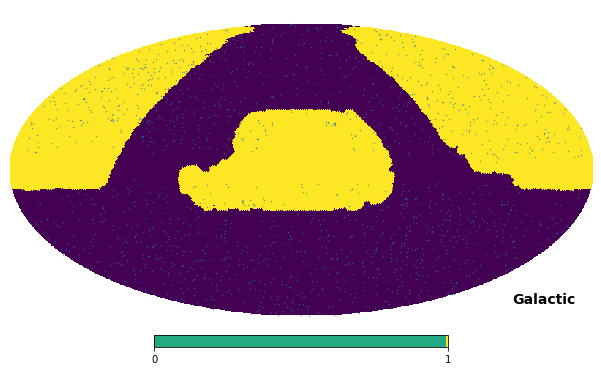

In [87]:
map1 = hp.read_map('masks/DESI.fits')
hp.mollview(map1,norm='hist',coord=['G'],title=' ')
hp.visufunc.projscatter(planck['glon'],planck['glat'],s=0.1,lonlat= True)

In [89]:
# Read in dr9 catalog
dr9 = pd.read_csv('masks/dr9.tsv',sep='\t',header=None)
dr9.columns = ['ra','dec']

In [90]:
c=SkyCoord(dr9['ra'],dr9['dec'],frame='icrs',unit='deg')
dr9['glat'] = c.galactic.b.degree # Galactic Latitude
dr9['glon'] = c.galactic.l.degree # Galactic Longitude

In [91]:
dr9.to_csv('masks/dr9.csv', header=None, index=False, columns=['glon','glat'])

In [92]:
dr9 = pd.read_csv("masks/dr9.csv",header=None)
dr9.columns = ['glon','glat']
dr9

,glon,glat
0,136.662636,-40.943468
1,55.602221,31.846666
2,313.370385,61.128514
3,72.599428,41.429880
4,92.175825,-35.420653
...,...,...
46474,46.861993,-36.312474
46475,253.093638,47.546325
46476,69.515189,-26.720882
46477,225.825134,27.329967


/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a g

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


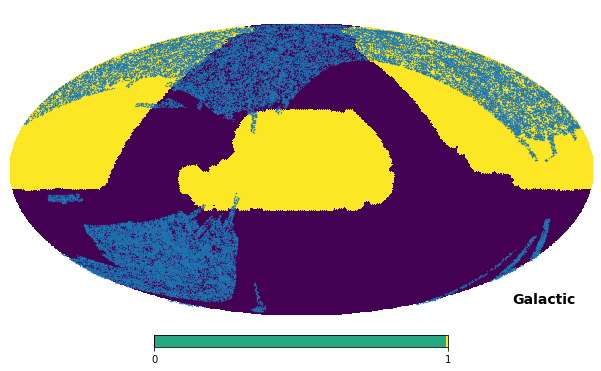

In [93]:
map1 = hp.read_map('masks/DESI.fits')
hp.mollview(map1,norm='hist',coord=['G'],title=' ')
hp.visufunc.projscatter(dr9['glon'],dr9['glat'],s=0.1,lonlat= True)

In [97]:
# Read in sdss catalog
sdss = pd.read_csv('masks/sdss.tsv',sep='\t',header=None)
sdss.columns = ['ra','dec']

In [98]:
c=SkyCoord(sdss['ra'],sdss['dec'],frame='icrs',unit='deg')
sdss['glat'] = c.galactic.b.degree # Galactic Latitude
sdss['glon'] = c.galactic.l.degree # Galactic Longitude

In [99]:
sdss.to_csv('masks/sdss.csv', header=None, index=False, columns=['glon','glat'])

In [100]:
sdss = pd.read_csv("masks/sdss.csv",header=None)
sdss.columns = ['glon','glat']
sdss

,glon,glat
0,111.286050,-26.188042
1,110.144763,-30.534417
2,101.077181,-53.611036
3,109.225712,-33.766901
4,102.320175,-51.416129
...,...,...
2191024,111.087488,-26.965007
2191025,98.737930,-57.167019
2191026,98.737930,-57.167019
2191027,107.029989,-40.556963


NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


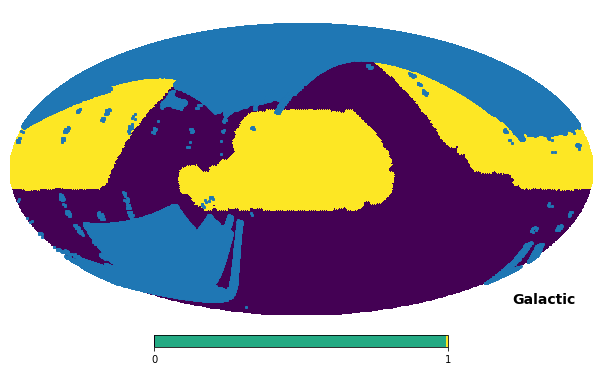

In [104]:
map1 = hp.read_map('masks/DESI.fits')
hp.mollview(map1,norm='hist',coord=['G'],title=' ')
hp.visufunc.projscatter(sdss['glon'],sdss['glat'],s=4,lonlat= True)

---

In [2]:
hdul = fits.open("overlaps/masks/DR5_cluster-catalog_v1.1.fits")

In [3]:
data = hdul[1].data

In [12]:
RA = data['RADeg']
dec = data['decDeg']

In [14]:
c=SkyCoord(RA,dec,frame='icrs',unit='deg')
glat = c.galactic.b.degree # Galactic Latitude
glon = c.galactic.l.degree # Galactic Longitude

In [15]:
adv = pd.DataFrame({'glat':glat,
                    'glon':glon})

In [16]:
adv

,glat,glon
0,-74.269559,342.746165
1,-70.264812,331.113939
2,-78.648931,25.118856
3,-73.619467,340.100462
4,-61.190547,95.689535
...,...,...
4190,-70.163948,331.773843
4191,-58.173997,97.757203
4192,-68.388121,327.905118
4193,-64.926874,322.698722


In [18]:
adv.to_csv('overlaps/masks/adv.csv', header=None, index=False, columns=['glon','glat'])

In [4]:
adv = pd.read_csv("overlaps/masks/adv.csv",header=None)
adv.columns = ['glon','glat']
adv

,glon,glat
0,342.746165,-74.269559
1,331.113939,-70.264812
2,25.118856,-78.648931
3,340.100462,-73.619467
4,95.689535,-61.190547
...,...,...
4190,331.773843,-70.163948
4191,97.757203,-58.173997
4192,327.905118,-68.388121
4193,322.698722,-64.926874


NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a g

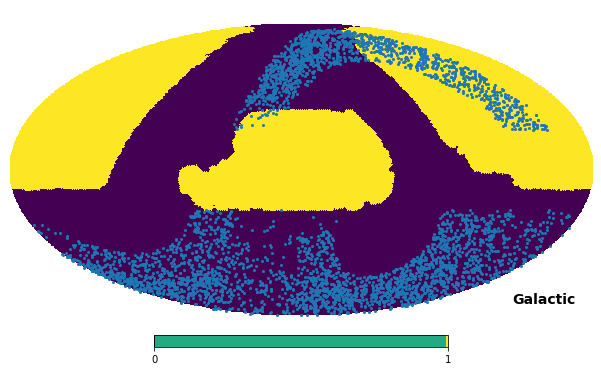

In [5]:
map1 = hp.read_map('overlaps/masks/DESI.fits')
hp.mollview(map1,norm='hist',coord=['G'],title=' ')
hp.visufunc.projscatter(adv['glon'],adv['glat'],s=4,lonlat= True)